# Face Detection with Haar Cascades

Note: This is face Detection, NOT face recognition.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Images

In [2]:
nadia = cv2.imread('../DATA/Nadia_Murad.jpg',0)
denis = cv2.imread('../DATA/Denis_Mukwege.jpg',0)
solvay = cv2.imread('../DATA/solvay_conference.jpg',0)                    

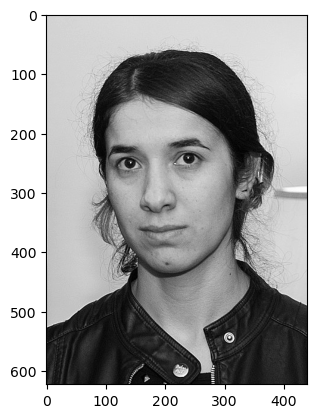

In [3]:
plt.imshow(nadia,cmap='gray')

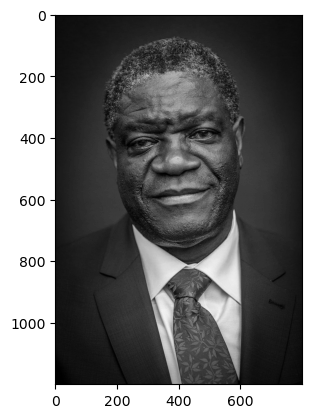

In [4]:
plt.imshow(denis,cmap='gray')

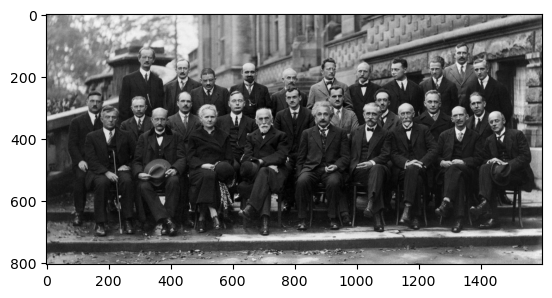

In [5]:
plt.imshow(solvay,cmap='gray')

# Cascade Files 

in Data Folder

# Face Detection

In [6]:
face_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_frontalface_default.xml')

In [7]:
def detect_face(img):
    
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w,y+h),(0,255,0),10)
        
    return face_img

In [8]:
result = detect_face(denis)

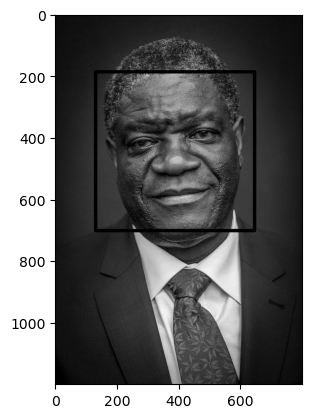

In [9]:
plt.imshow(result,cmap='gray')

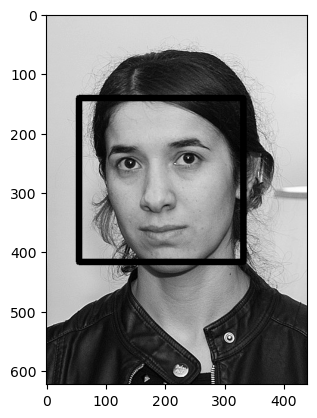

In [10]:
result = detect_face(nadia)
plt.imshow(result,cmap='gray')

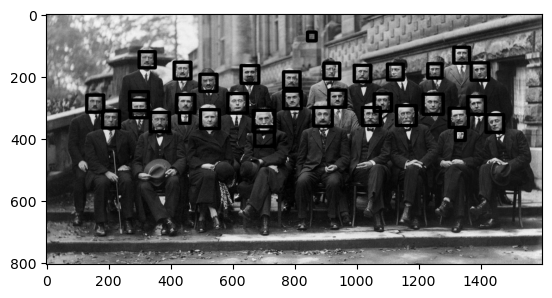

In [11]:
result = detect_face(solvay)
plt.imshow(result,cmap='gray')

In [12]:
def adj_detect_face(img):
    
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w,y+h),(255,255,255),10)
        
    return face_img

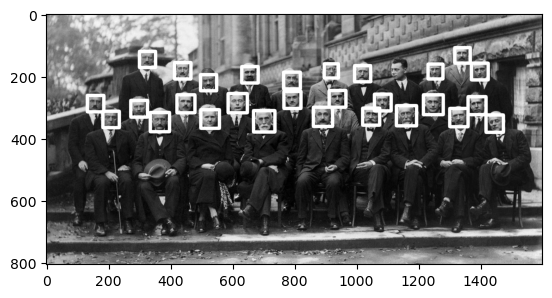

In [13]:
result = adj_detect_face(solvay)
plt.imshow(result,cmap='gray')

# Eye Cascade File

In [14]:
eye_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_eye.xml')

In [15]:
def detect_eye(img):
    
    face_img = img.copy()
    
    eyes = eye_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in eyes:
        cv2.rectangle(face_img, (x,y), (x+w,y+h),(0,0,255),10)
        
    return face_img

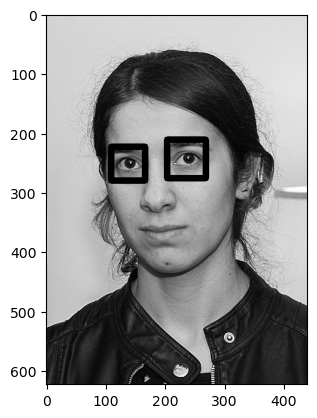

In [16]:
result = detect_eye(nadia)
plt.imshow(result,cmap='gray')

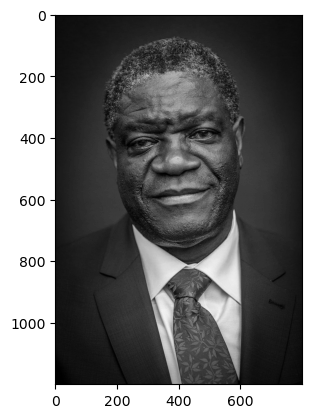

In [17]:
result = detect_eye(denis)
plt.imshow(result,cmap='gray')

# Conjunction with Video

In [22]:
cap = cv2.VideoCapture(1)

while True:
    
    ret, frame = cap.read()
    face_rects = face_cascade.detectMultiScale(frame,1.1, 5)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(frame, (x,y), (x+w,y+h),(0,255,0),10)
        eyes = eye_cascade.detectMultiScale(frame, 0.5)
        for (x,y,w,h) in eyes:
            cv2.rectangle(frame, (x,y), (x+w,y+h),(0,0,255),10)
    # cv2.flip(frame, 1)
    cv2.imshow('Face Detection', frame)
       
    
    k = cv2.waitKey(1)
    # cv2.flip(frame, 1)
    if k == 27:
        break
        
cap.release()
cv2.destroyAllWindows()
    

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1389: error: (-215:Assertion failed) scaleFactor > 1 && _image.depth() == CV_8U in function 'cv::CascadeClassifierImpl::detectMultiScale'
